In [1]:
from gfn import GFNAgent

In [2]:
agent = GFNAgent(epochs=200)

First, let's take a look at the environment. The default is a 2D 8x8 grid with high reward in the corners.

In [ ]:
agent.env.plot_reward_2d()

We can also look at the model structure. Notice that in this implementation, the learned parameter `z0` is separate from the neural net, and that the neural net has two output "heads": `foward_policy` and `backward_policy`. 

In [ ]:
agent.model.summary()

In [ ]:
agent.z0

For this demonstration, we'll just show that the GFlowNet can learn a policy that generates trajectories proportional to the reward. To do that, we'll first sample a large training set using the untrained, random policy.

157/157 [==============================] - 0s 821us/step


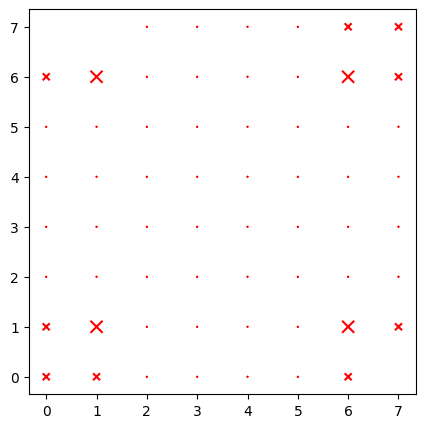

In [3]:
agent.sample(5000)
agent.plot_sampled_data_2d()

In [ ]:
u_modes, u_positions = agent.count_modes()
print(f'There are {u_modes} unique modes and {u_positions} unique positions in the training data.')

Before training, the policy is uniform. The likelihood of transitioning vertically or laterally (arrows) or terminating (red octogon) is essentially uniform at every point.

The probability of terminating at each position is plotted below, and we can see that without training, it looks nothing like the reward environment we plotted above. The termination probabilities are large enough, that any trajectory is unlikely to leave the origin (bottom left).

2/2 [==============================] - 0s 3ms/step


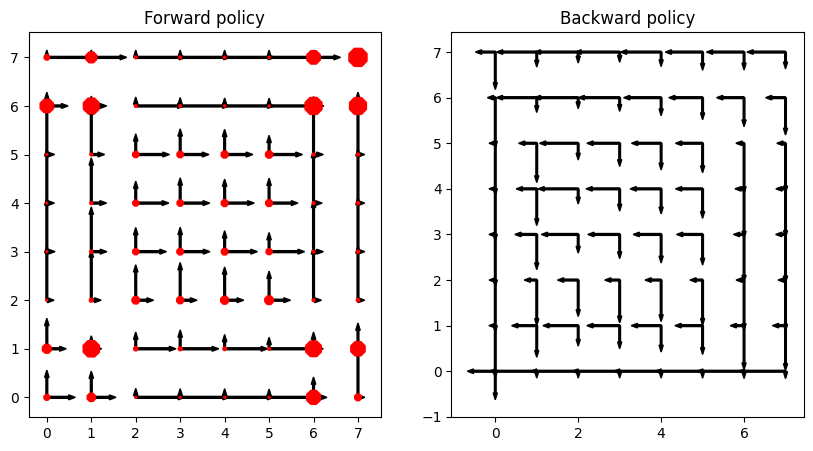

In [5]:
agent.plot_policy_2d()

In [ ]:
l1_error_before = agent.compare_env_to_model_policy()

Let's train it and see if we can do better!

In [3]:
agent.sample(1000)
agent.train()

32/32 [==============================] - 0s 2ms/step
Start training...
[[0.48784113 2.04863548]]
[[0.19233023 0.80766977]]
[[0.48066339 1.55800974]]
[[0.23577266 0.76422734]]
[[0.53468126 0.93063736]]
[[0.36489078 0.63510922]]
[[0.52337497 0.47662503]]
[[0.52337497 0.47662503]]
[[0.         0.48787901]]
[[0. 1.]]
[[0.         1.08200598]]
[[0. 1.]]
[[0.         0.48787901]]
[[0. 1.]]
[[1.81766963 0.54558259]]
[[0.76913908 0.23086092]]
[[1.47934583 0.50688469]]
[[0.74480067 0.25519933]]
[[0.99827373 0.50086313]]
[[0.66589899 0.33410101]]
[[0.52337497 0.47662503]]
[[0.52337497 0.47662503]]
[[0.         0.48787901]]
[[0. 1.]]
[[2.24584684 2.20332241]]
[[0.50477892 0.49522108]]
[[1.80573022 2.19426966]]
[[0.45143257 0.54856743]]
[[1.5189563  1.86078268]]
[[0.44943006 0.55056994]]
[[1.62631083 1.18684459]]
[[0.57810913 0.42189087]]
[[1.44074741 1.03950179]]
[[0.58088817 0.41911183]]
[[0.89638472 1.1036154 ]]
[[0.44819233 0.55180767]]
[[0.99827373 0.50086313]]
[[0.66589899 0.33410101]]
[[0.5

KeyboardInterrupt: 

Let's plot the trained policy and sample from it to get a probability distribution over the environment:

In [ ]:
agent.plot_policy_2d()

In [ ]:
l1_error_after = agent.compare_env_to_model_policy()

In [ ]:
print(f'L1 error before {l1_error_before:.2f} and after {l1_error_after:.2f}')

While not perfect, the model has certainly learned to generate trajectories through the environment with probability proportional to the reward! It's a far better approximation than the untrained policy, and you can imagine that it would get better with some tweaks (e.g. more training, different optimizer, etc.)

In [2]:
from gfn import GFNAgent
agent = GFNAgent(epochs=200)
l = agent.sample_trajectories(2)

1/1 [==============================] - 0s 150ms/step
[[0.376489   0.25777655 0.36573445]
 [0.37648899 0.25777654 0.36573447]]
[[0. 1. 0.]
 [0. 0. 1.]]
1/1 [==============================] - 0s 24ms/step
[[0.34950482 0.31951355 0.33098163]
 [0.37648899 0.25777654 0.36573447]]
[[0. 0. 1.]
 [0. 0. 1.]]
1/1 [==============================] - 0s 25ms/step
[[0.34950482 0.31951355 0.33098163]
 [0.33333333 0.33333333 0.33333333]]
[[0. 0. 1.]
 [0. 0. 1.]]
1/1 [==============================] - 0s 28ms/step
[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]
[[0. 0. 1.]
 [1. 0. 0.]]
1/1 [==============================] - 0s 30ms/step
[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]
[[0. 1. 0.]
 [0. 0. 1.]]
1/1 [==============================] - 0s 36ms/step
[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]
[[1. 0. 0.]
 [1. 0. 0.]]
1/1 [==============================] - 0s 31ms/step
[[0.33333333 0.33333333 0.33333333]
 [0.3333333

In [ ]:
l[0].shape, l[1].shape

In [ ]:
import tensorflow as tf
one_hot_positions = tf.one_hot(l[0][0], 8, axis=-1)
one_hot_positions[0]

In [ ]:
import tensorflow_probability as tfp
tfd = tfp.distributions
for i, action in enumerate(tfd.Categorical(probs=l[1][0]).sample().numpy()):
    print(action == (agent.action_space - 1))

In [ ]:
l[1][0]